<a href="https://colab.research.google.com/github/Kindaja/Prediction-of-Products-Sales/blob/main/Prediction_of_product_sales_Project_Part_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of product sales**
- ***Author: Kinda Abuasbeh & Wael Aboudi***




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Project-1 Overview**

***The first project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.***

- Insert code below the heading "Loading Data"
 - Use Pandas to read the sales prediction data set into Google Colab.
 - Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
- Insert code below the heading "Data Cleaning"
 - Explore the data - what do you need to do to clean this data? Clean it!
 - Be sure to address each of the following tasks:

1) How many rows and columns?
- Answer: 8523 rows and 12 columns

2) What are the datatypes of each variable?
- Answer:
 -  0   Item_Identifier            8523 non-null   object
  - 1   Item_Weight                7060 non-null   float64
  - 2   Item_Fat_Content           8523 non-null   object
  - 3   Item_Visibility            8523 non-null   float64
  - 4   Item_Type                  8523 non-null   object
  - 5   Item_MRP                   8523 non-null   float64
  - 6   Outlet_Identifier          8523 non-null   object
  - 7   Outlet_Establishment_Year  8523 non-null   int64  
  - 8   Outlet_Size                6113 non-null   object
  - 9   Outlet_Location_Type       8523 non-null   object
  - 10  Outlet_Type                8523 non-null   object
  - 11  Item_Outlet_Sales          8523 non-null   float64

3) Are there duplicates? If so, drop any duplicates.
- Answer: we don't have any duplicates to drop
4) Identify missing values.
- Answer: we have missing values in Item_Weight and Outlet_Size
5) Address the missing values by using a placeholder value.
- Answer: we used '-1','MISSING' placeholder values

6) Confirm that there are no missing values after addressing them.
- Answer:Confirmed

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).
- Answer: found and fixed inconsistent values in Item_Fat_Content

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).
- Answer: Done



## **Load and inspect data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')
fpath='/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv(fpath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df2=df.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- It is clear that we have missing vakues in the columns "Item_Weight" and "Outlet_Size".

## **Clean Data**

In [8]:
df.duplicated().sum()

0

***No duplicate values found***

In [9]:
itm_weight_null=df['Item_Weight'].isna()
df[itm_weight_null]
df['Item_Weight']=df['Item_Weight'].fillna('-1')
df['Item_Weight'].value_counts()

,count
Item_Weight,
-1,1463
12.15,86
17.6,82
13.65,77
11.8,76
...,...
7.275,2
7.685,1
9.42,1


In [10]:
outlet_size_null=df['Outlet_Size'].isna()
df[outlet_size_null]
df['Outlet_Size']=df['Outlet_Size'].fillna('MISSING')
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
MISSING,2410
Small,2388
High,932


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


In [12]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


 - NO missing values now.

In [13]:
df[df['Item_Visibility']==0.000000]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.2,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.8,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.7,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,-1,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8484,DRJ49,6.865,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736
8486,FDR20,20.0,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998,MISSING,Tier 3,Grocery Store,45.2744
8494,NCI54,15.2,Low Fat,0.0,Household,110.4912,OUT017,2007,MISSING,Tier 2,Supermarket Type1,1637.8680


Zero visibility with ongoing sales indicates that the items are likely being sold through non-public(online, back-end, internal sales) channels or to a specific audience rather than through traditional retail visibility.

In [14]:
df['Item_Fat_Content'].value_counts()
replace_dic={'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}
df['Item_Fat_Content']=df['Item_Fat_Content'].replace(replace_dic)
df['Item_Fat_Content'].value_counts()


,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


 - Data is consistent now.

In [15]:
num_cols= df.select_dtypes(include=np.number)
num_cols.columns

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales'],
      dtype='object')

In [16]:
for col in num_cols.columns:
  print(f"{col} max is: {df[col].max()}\n min is: {df[col].min()}\n mean is: {df[col].mean()}\n median is: {df[col].median()}\n")

Item_Visibility max is: 0.328390948
 min is: 0.0
 mean is: 0.06613202877895108
 median is: 0.053930934

Item_MRP max is: 266.8884
 min is: 31.29
 mean is: 140.9927819781767
 median is: 143.0128

Outlet_Establishment_Year max is: 2009
 min is: 1985
 mean is: 1997.8318667135984
 median is: 1999.0

Item_Outlet_Sales max is: 13086.9648
 min is: 33.29
 mean is: 2181.288913575032
 median is: 1794.331



###For Part 3, your task is to create exploratory visuals that might help you understand, explain, or model your data. This must include at least one of each:

 - Histograms to view the distributions of numerical features in your dataset.
 - Boxplots to view statistical summaries of numerical features in your dataset.
 - Countplots to view the frequency of each class of categorial features in your dataset.
 - Heatmap to view the correlation between features.

## **Exploratory Data Analysis**

##1) Inspect correlations between numerical columns.
This will guide us in visualizing the most significant relationships..

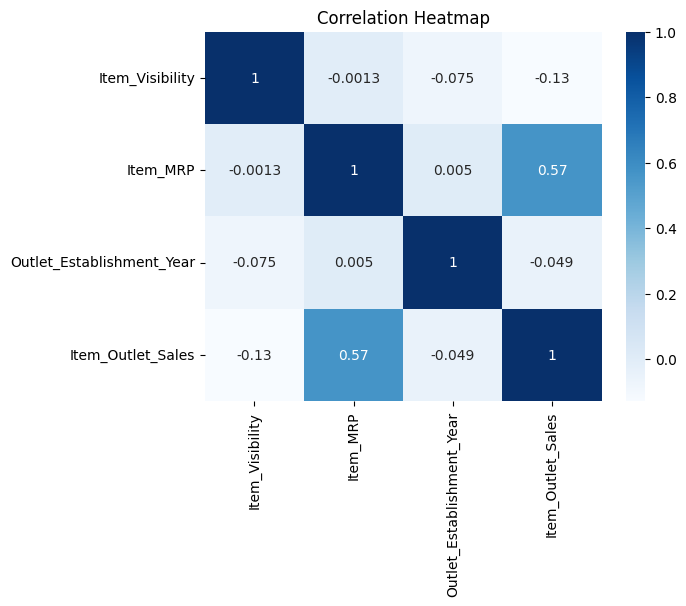

In [17]:
corr= df.corr(numeric_only= True)
heat_map= sns.heatmap(corr, annot=True, cmap='Blues')
heat_map.set(title='Correlation Heatmap');

It is clear from the heat map that there is a significant relation between Item_MRP and Item_Outleat_Sales.
WE will start by plotting the relation between those two features.


# Explore Item_MRP & Item_Outlet_Sales.

1) Scatterplot the relation between Item_MRP and Item_Outlet_Sales.

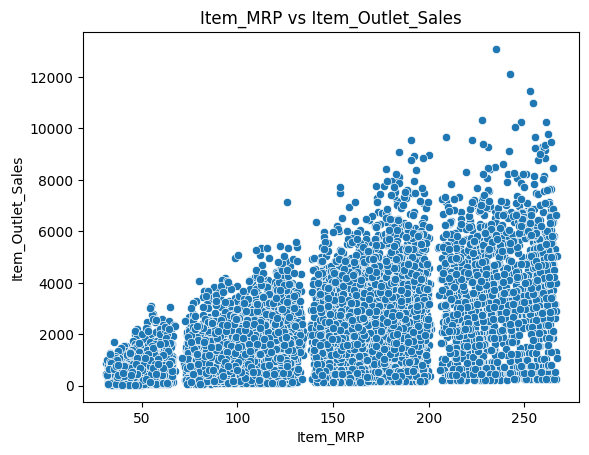

In [18]:
scatter= sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales')
scatter.set(title='Item_MRP vs Item_Outlet_Sales');

From the scatterplot we can conclude the following:
 - There is a clear upward trend, this means that higher priced items are associated with higher sales ranges.
 - The sales values range from zero to over 12000, with significant number of items having sales in the lower ranges, while fewer items reach the highest sales.
 -There are a few points at the higher end of the sales scale, which means that some items, despite being in the same price range, achieve significantly higher sales.
 - the most leading thing is: The data points are clustered into distinct groups, particularly around certain price ranges ( 50-100, 150-200, and 200-250). This may indicate that certain price points are more popular or that sales are influenced by pricing strategies. This will help tp put good strategies on prices to drive the best sales.

 Plan: Create new features or variables that may enhance the model's predictive power, such as categorizing prices into ranges.

#Segmentation
Step1- Grouping data due to some price categories analyze sales performance within each segment.
we will consider four distinct groups:
 - Low Price: Item_MRP ≤ 100
 - Medium Price: 100 < Item_MRP ≤ 200
 - High Price: 200 < Item_MRP ≤ 250
 - Premium Price: Item_MRP > 250

In [19]:
def segment_price(row):
    if row['Item_MRP'] <= 100:
        return 'Low Price'
    elif 100 < row['Item_MRP'] <= 200:
        return 'Medium Price'
    elif 200 < row['Item_MRP'] <= 250:
        return 'High Price'
    else:
        return 'Premium Price'

df['Price Segment'] = df.apply(segment_price, axis=1)

In [20]:
#Make sure that it is added to the df
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price Segment
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,High Price
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Low Price
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Medium Price
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800,Medium Price
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Low Price


In [21]:
#check the percenteges of the values of the price segment column
df['Price Segment'].value_counts()*100/len(df)

,count
Price Segment,
Medium Price,54.487856
Low Price,28.616684
High Price,11.686026
Premium Price,5.209433


Step2- Data Aggregation
 Calculate average sales, total sales, and number of items sold within each segment.

In [22]:
# Aggregate sales data by price segment
segmentation_summary = df.groupby('Price Segment').agg(
    Average_Sales=('Item_Outlet_Sales', 'mean'),
    Total_Sales=('Item_Outlet_Sales', 'sum'),
    Item_Count=('Item_Outlet_Sales', 'count')
).round(2).reset_index()




print(segmentation_summary)

   Price Segment  Average_Sales  Total_Sales  Item_Count
0     High Price        3600.74   3586338.36         996
1      Low Price        1019.99   2487750.38        2439
2   Medium Price        2326.85  10805874.74        4644
3  Premium Price        3853.97   1711161.93         444


Step 3- Visualization
 Create bar charts or box plots to visualize sales performance across segments.

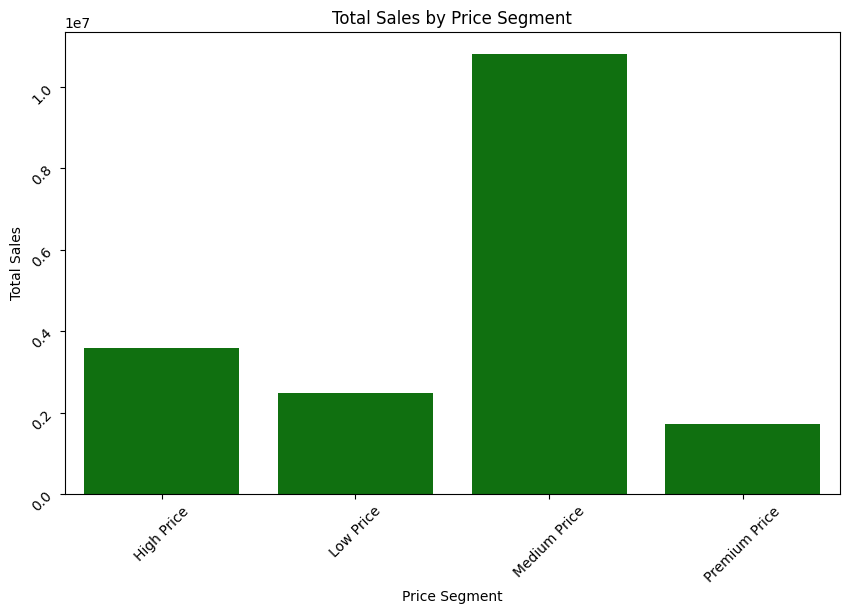

In [23]:
#3a) Visualization of average sales by price segment by barplot
plt.figure(figsize=(10, 6))
ax= sns.barplot(x='Price Segment', y='Total_Sales', data=segmentation_summary, color="green")
plt.title('Total Sales by Price Segment')
plt.xlabel('Price Segment')
plt.ylabel('Total Sales')
ax.tick_params(axis='y', rotation=45)
plt.xticks(rotation=45);

From the barplot:
   - Medium Price Segment: This segment has the highest total sales, significantly surpassing the others, with sales reaching approximately 10 million.

   - High Price Segment: The sales in this segment are lower than the Medium Price segment, but still substantial, at around 4 million.

   - Low Price Segment: This segment shows even lower sales than the High Price segment, with total sales of about 2 million.

   - Premium Price Segment: This segment has the lowest sales, with totals around 1 million.


  **Insights:**
  - Company may consider focusing Medium Price segment is the most successful in terms of sales, while the Premium Price segment lags behind. This could suggest a preference for mid-range pricing among consumers.
  - Understanding consumer preferences and market dynamics in each segment could further enhance sales strategies.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


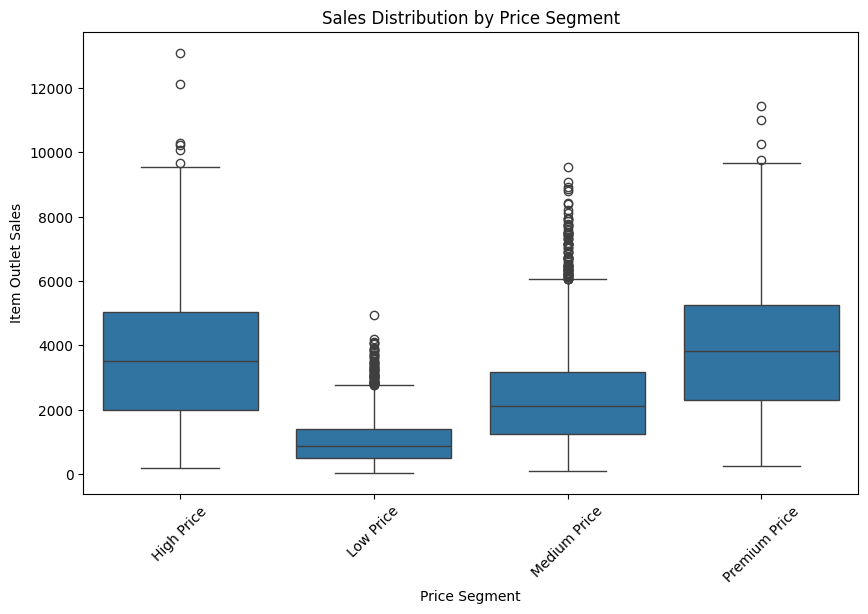

In [24]:
# 3b) Visualizing box plot for sales distribution by price segment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price Segment', y='Item_Outlet_Sales', data=df)
plt.title('Sales Distribution by Price Segment')
plt.xlabel('Price Segment')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45);

From the boxplot, in addition to what was achieved from the barplot we may mention:
 - High Price Segment & premium price segment:

These segments show the higher medians sales, with a box extending from around 2000 to over 5,000. The presence of several outliers above 10,000 indicates that some high-priced items achieve significantly higher sales.The interquartile range (IQR) suggests a consistent sales performance.
 - Low Price Segment:

This segment has the lowest median sales, with the box extending from around 1,000 to arround 1800. The presence of outliers indicates that while some low-priced items achieve higher sales, the overall performance is less consistent compared to other segments.
 - Medium Price Segment:

The median sales are moderate, with the box ranging from about 1000 to more than 3000. This segment has a wider spread, indicating variability in sales performance, with several outliers suggesting some items perform exceptionally well.

 **Insights:**
 - The box plot illustrates a clear trend where higher price segments tend to have higher median sales, reinforcing the earlier findings from the bar chart.
 - The presence of outliers in all segments suggests that while most items perform within a certain range, there are exceptional cases that significantly boost sales figures.

##Overall insights regarding pricing strategies:
 - Retailers should consider expanding their offerings in High and premium segments, possibly introducing new premium products or enhancing marketing efforts to attract more customers willing to spend on high-quality items.
 - Retailers should analyze the specific items within the mediam price segment to identify which products are underperforming and consider strategies such as promotions or bundling to boost sales.
 - Retailers should investigate the reasons behind the low sales in the low  
 price segment. Strategies could include improving product visibility, enhancing marketing efforts, or reevaluating pricing strategies to make these items more appealing.
 -From outliers in all segments we can understand what drives their success by checking their unique features, effective marketing, or seasonal demand.
 Leveraging insights from these outliers can inform product development and marketing strategies across all segments.


###Inspect more relations in categorical features

In [25]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price Segment
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,High Price
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Low Price
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Medium Price
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800,Medium Price
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Low Price


##2) Inspect correlations between categorical columns and sales.
After identifying the most significant price categories and the positive relation between sales and item_MRP in the first part, we will check their relations with some categorical features to determine possible important features that may drive high sales.

**1) Item_Outlet_Sales vs Item_Fat_Content**

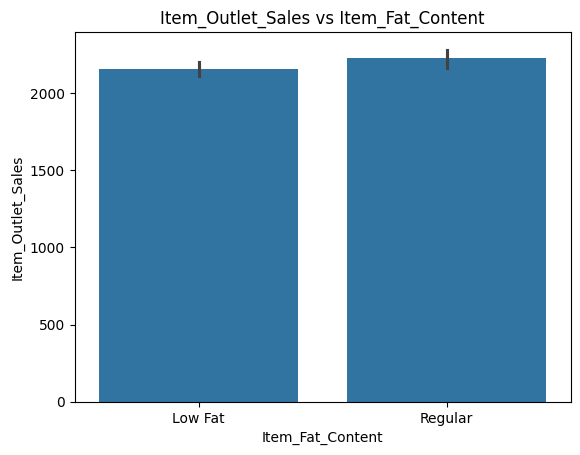

In [26]:
# barplot plot for Item_Outlet_Sales vs Item_Fat_Content
plott= sns.barplot(data=df, y='Item_Outlet_Sales', x='Item_Fat_Content')
plott.set(title='Item_Outlet_Sales vs Item_Fat_Content');

This means that there is no significant relation between sales and fat content.

**2) What are the most popular outlet types?**

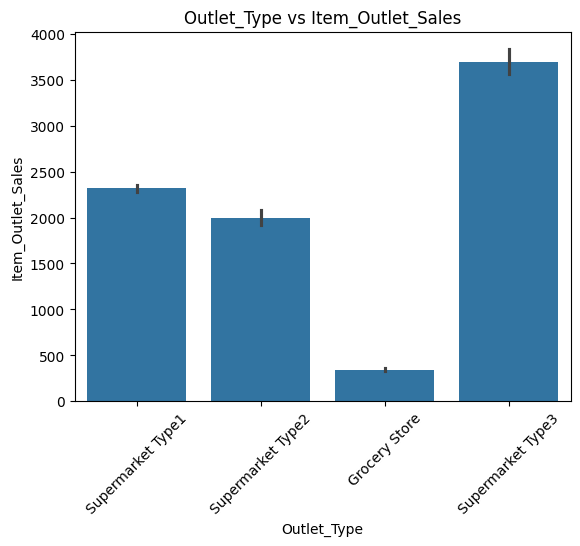

In [27]:
# Bar plot for outlet types and sales
bar_outlet_type= sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales')
bar_outlet_type.set(title='Outlet_Type vs Item_Outlet_Sales')
plt.xticks(rotation=45);


From the bar plot we can say:
 - Supermarket Type has the highest average sales, reaching nearly 4,000. This suggests that Supermarket Type 3 is the most successful in generating sales among the outlet types.
 The high sales could be attributed to factors such as a wider product range, size, better marketing strategies, or a more favorable location.
 - Supermarket Type 1 and Supermarket Type outlet types show almost similar average sales figures, around 2,000 to 2,500. This indicates a moderate performance compared to Supermarket Type 3.
 Retailers may want to analyze the differences between these two types and Supermarket Type 3 to identify potential areas for improvement.
 - Grocery Store outlet type has the lowest average sales, at around 500. This suggests that grocery stores may struggle to compete with larger supermarket formats.
 Retailers should investigate the reasons behind this low performance, which could include limited product variety, less effective marketing, or location disadvantages.

**TO Do:**

 Supermarket type 3 need to be investigated more to highlight possible reasons of high sales which will help in applying new strategies on the other types of markets.

In [28]:
#Create visualizations to analyze the impact of Outlet_Size and Outlet_Location_Type on item outlet sales.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


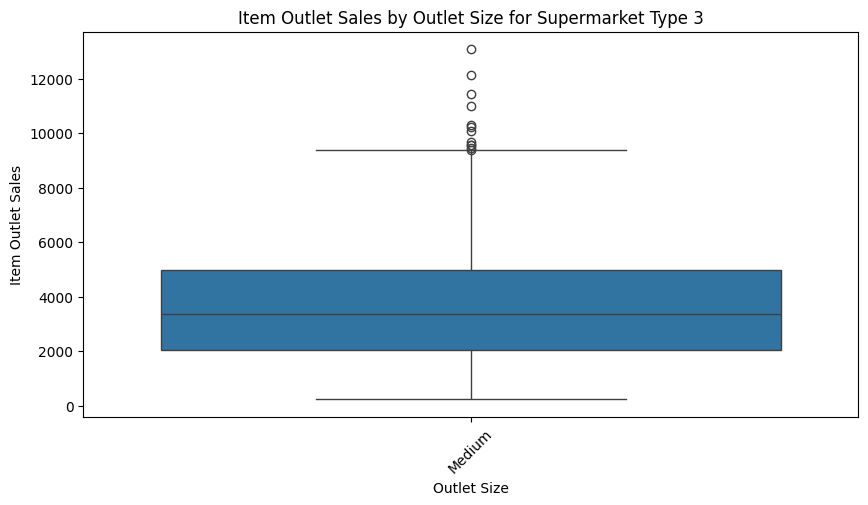

In [29]:
# Filter the dataset for Supermarket Type 3
type_3_df = df[df['Outlet_Type'] == 'Supermarket Type3']

# Exploring Outlet_Size
plt.figure(figsize=(10, 5))
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=type_3_df)
plt.title('Item Outlet Sales by Outlet Size for Supermarket Type 3')
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45);

In [30]:
type_3_df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,935


All supermarkets of type 3 are of medium size, we can not relate the high sales to the size of the outlet unless we will check the relation with the total sales

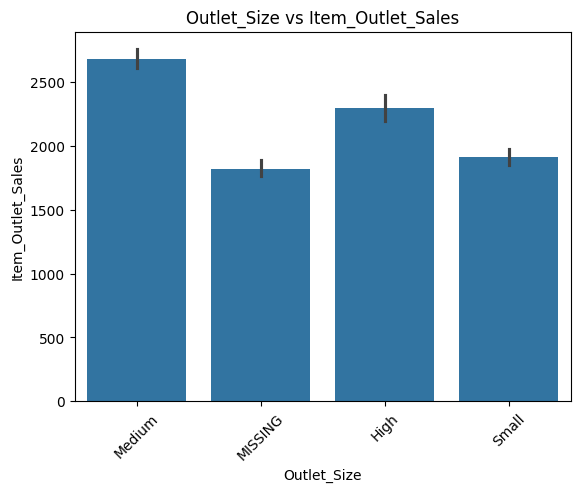

In [31]:
#barplot for Outlet_Size and sales
bar_size= sns.barplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales')
bar_size.set(title='Outlet_Size vs Item_Outlet_Sales')
plt.xticks(rotation=45);

It seems that the medium size of the supermarkets has the greatest level of sales, though the other sizes are close to the medium size, we can take it in consideration.

**3) What are the most popular outlet types?**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


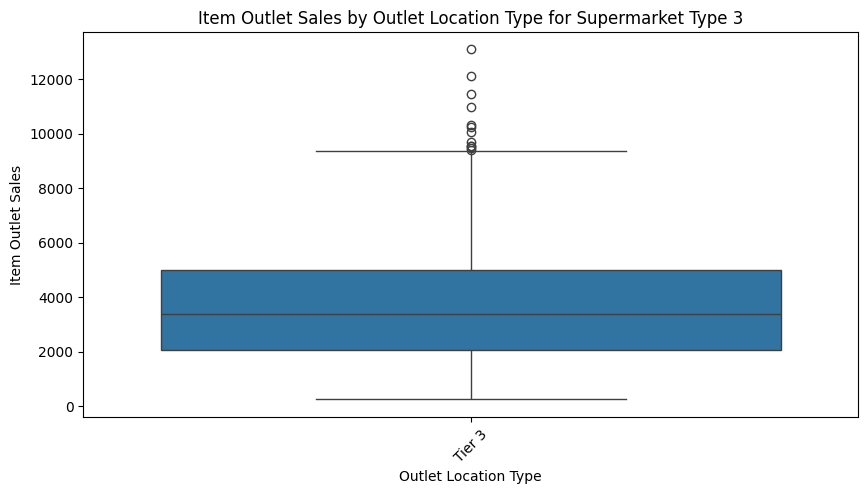

In [32]:
# Exploring Outlet_Location_Type
plt.figure(figsize=(10, 5))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=type_3_df)
plt.title('Item Outlet Sales by Outlet Location Type for Supermarket Type 3')
plt.xlabel('Outlet Location Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45);

All supermarkets of type 3 are in tier 3, we can not relate the high sales to the location of the outlet unless we will check the relation with the total sales

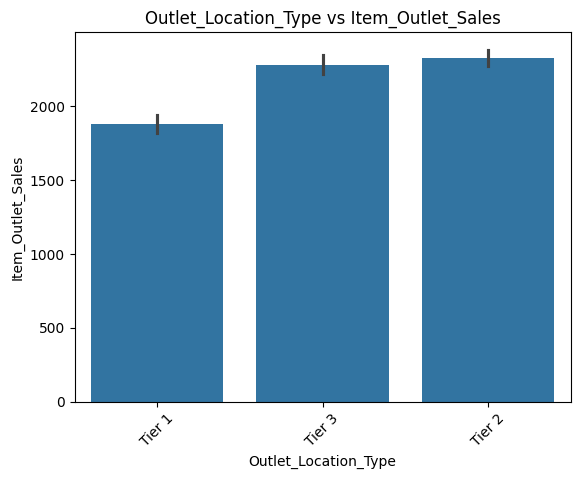

In [33]:
#barplot for Outlet_Location_Type and sales
bar_location= sns.barplot(data=df, x='Outlet_Location_Type', y='Item_Outlet_Sales')
bar_location.set(title='Outlet_Location_Type vs Item_Outlet_Sales')
plt.xticks(rotation=45);


I think there is no significant differences between the three tires appears in the data.
Retailers may give valuable consideration to medium sizes of supermarkets.

**4) What are the most popular Item_Type?**

In [34]:
df["Item_Type"].dtype

dtype('O')

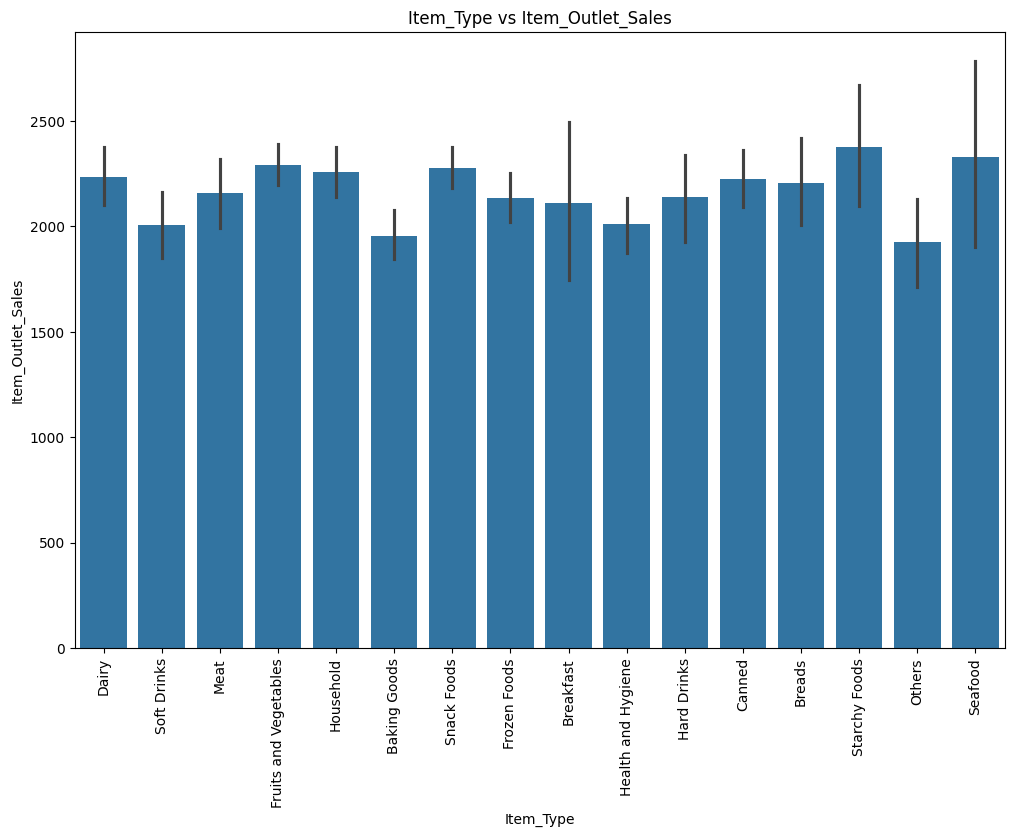

In [35]:
#Create barplot for Item_Type vs Item_Outlet_Sales
plt.figure(figsize=(12, 8))
bar_item_type= sns.barplot(data=df, x='Item_Type', y='Item_Outlet_Sales')
bar_item_type.set(title='Item_Type vs Item_Outlet_Sales')
plt.xticks(rotation=90);

It seems that all types have close sales, which means we can not depend on it to drive sales best.

**5) Is the Outlet_Establishment_Year related to sales, trust!**

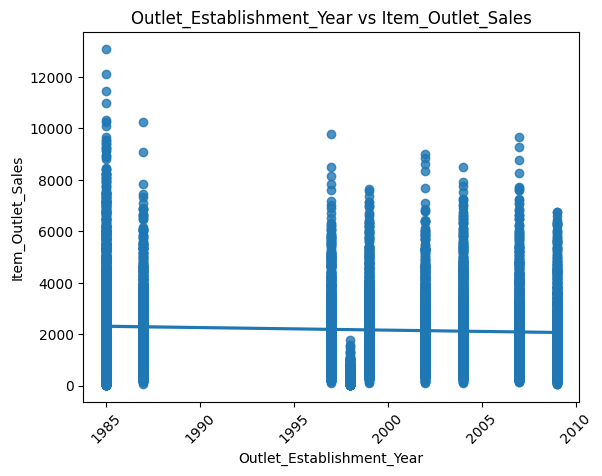

In [36]:
#Scatter plot for the Outlet_Establishment_Year and Item_Outlet_Sales
scatter_year= sns.regplot(data=df, x='Outlet_Establishment_Year', y='Item_Outlet_Sales')
scatter_year.set(title='Outlet_Establishment_Year vs Item_Outlet_Sales')
plt.xticks(rotation=45);

Somehow, it is a very week negative relation beween establishment year and sales, which means customers tends to trust old markets, however, we can not depend on the establishment year to drive high sales.

**6) Is the Item_Visibility related and Item_Weight to sales?**




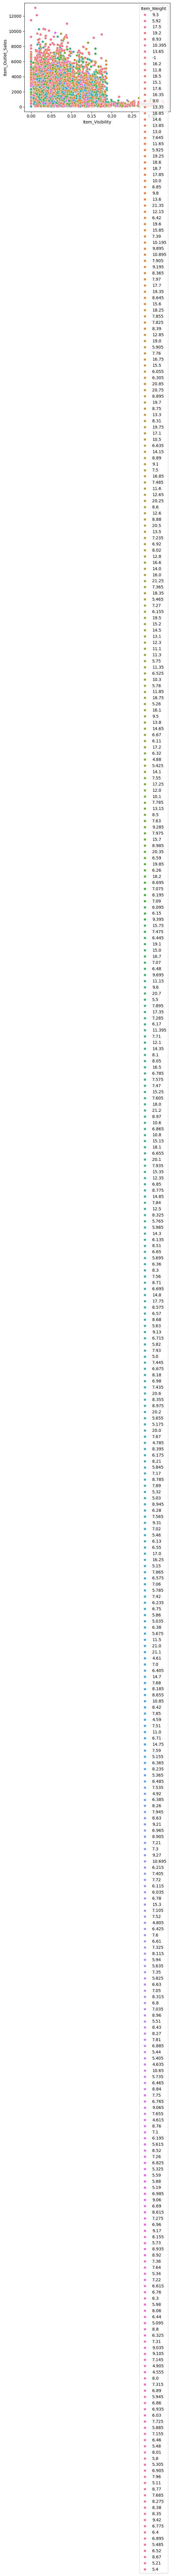

In [37]:
#Create a scatter plot for Item_Visibility related and Item_Weight to sales and Item_Outlet_Sales
ax=sns.scatterplot(data=df, x="Item_Visibility", y="Item_Outlet_Sales", hue="Item_Weight")

 -  There is a noticeable downward trend in sales as item visibility increases. Higher visibility does not necessarily correlate with higher sales, indicating that other factors may influence sales performance.
  - The leftside part of the figure is introducing the missing values.

# **Project 1 Part 4**

##**Remove the placeholders you added in week 2 and replace them with null values**

In [38]:
df['Item_Weight'].value_counts()

,count
Item_Weight,
-1,1463
12.15,86
17.6,82
13.65,77
11.8,76
...,...
7.275,2
7.685,1
9.42,1


In [39]:
df['Item_Weight']=df['Item_Weight'].replace('-1',np.nan)
df['Item_Weight'].value_counts()

<ipython-input-39-e5db7b441f79>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Item_Weight']=df['Item_Weight'].replace('-1',np.nan)


,count
Item_Weight,
12.150,86
17.600,82
13.650,77
11.800,76
15.100,68
...,...
7.275,2
7.685,1
9.420,1


In [40]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
MISSING,2410
Small,2388
High,932


In [41]:
df['Outlet_Size']=df['Outlet_Size'].replace('MISSING',np.nan)
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


##**EDA Functions 1**
-UniVariate

In [42]:
# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

##**EDA Functions 2**
-MultiVariate

In [43]:
def plot_categorical_vs_target(df, x, y='charges',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='charges',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

#- **Feature Name: Item Visibility**
 - Definition: The percentage of total display area of all products in a store allocated to the particular product

##Check Feature Type

In [44]:
df['Item_Visibility'].dtype

dtype('float64')

##Univariate Visualization


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


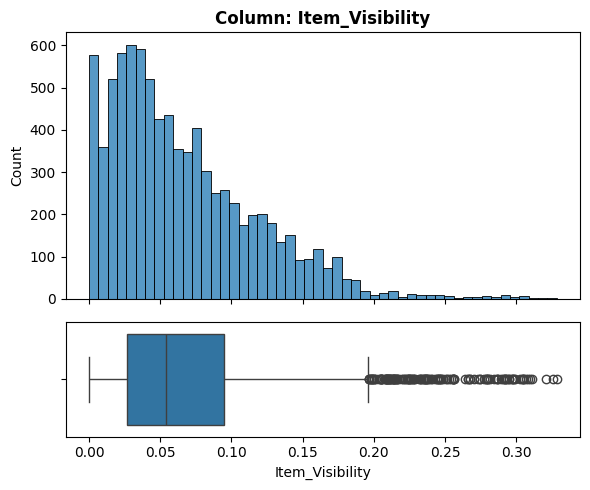

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [45]:
explore_numeric(df,'Item_Visibility');


What type of feature is it? (Categorical (nominal), ordinal, numeric)
  -  Answer: Numeric
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - Answer:0
- Is the feature constant or quasi-constant?
 - Answer:No
- What is the cardinality? Is it high (>10)?
 - Answer: NA, Numeric feature
- Would we know this feature before the target is determined?
 - Answer:Yes
- Is there a business case/understanding reason to exclude based on our business case?
 - Answer: Majority of products is located between 0.025 and 0.10 with significant outliers from 0.0 up to 0.40 which means that products are not with the same visibility levels. Depending on the analysis goals, it may be beneficial to exclude extreme outliers or focus on a specific range of visibility for more targeted insights.



##Multi Variate Visualization

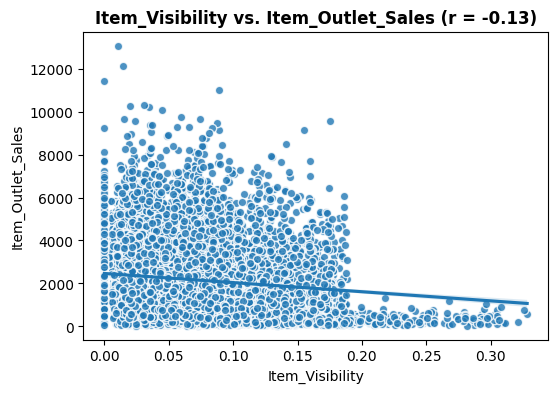

In [46]:
plot_numeric_vs_target(df,x='Item_Visibility', y='Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Answer: No
- Does this feature appear to be a predictor of the target?
 - Answer: Given the weak correlation and the scatter of data points, Item_Visibility does not appear to be a strong predictor of Item_Outlet_Sales. Other factors likely play a more significant role in determining sales performance.Further analysis of other features may be necessary to identify more significant predictors.

#- **Feature Name: Item Weight**
 - Definition: Weight of product

##Check Feature Type

In [47]:
df['Item_Weight'].dtype

dtype('float64')

##Univariate Visualization


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


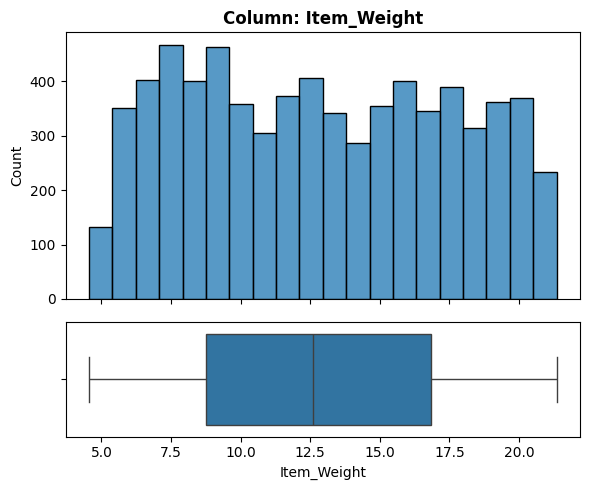

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [48]:
explore_numeric(df,'Item_Weight');


What type of feature is it? (Categorical (nominal), ordinal, numeric)
  -  Answer: Numeric
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - Answer:1463
- Is the feature constant or quasi-constant?
 - Answer:No
- What is the cardinality? Is it high (>10)?
 - Answer: NA, Numeric feature
- Would we know this feature before the target is determined?
 - Answer:Yes
- Is there a business case/understanding reason to exclude based on our business case?
 - Answer: The countplot and box plot of Item_Weight show a close to uniform distribution across various weight categories, with no significant outliers.If Item_Weight does not show a strong correlation with the target variable ( Item_Outlet_Sales), it may not provide significant predictive power. If the analysis indicates that weight does not influence sales, it could be considered for exclusion.



##Multi Variate Visualization

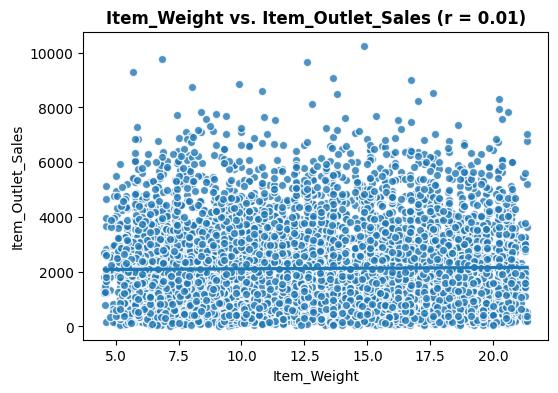

In [49]:
plot_numeric_vs_target(df,x='Item_Weight', y='Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Answer: No
- Does this feature appear to be a predictor of the target?
 - Answer: The data points are widely scattered across the range of item weights, with no noticable trend. Sales appear to be almost (weak correlation) regardless of the weight of the items, indicating that weight does not significantly influence sales performance.Given the weak correlation and lack of a clear relationship, there is a strong case for excluding Item_Weight from predictive modeling. It does not provide meaningful insights or predictive power regarding sales.

#- **Feature Name: Outlet_Type**
 - Definition:Whether the outlet is a grocery store or some sort of supermarket

##Check Feature Type

In [50]:
df['Outlet_Type'].dtype

dtype('O')

##Univariate Visualization


<ipython-input-42-9db5c58463e2>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


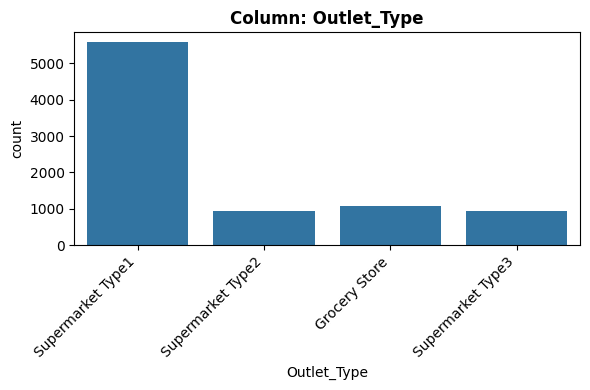

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [51]:
explore_categorical(df,'Outlet_Type');


What type of feature is it? (Categorical (nominal), ordinal, numeric)
  -  Answer: Categorical
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - Answer:0
- Is the feature constant or quasi-constant?
 - Answer:No
- What is the cardinality? Is it high (>10)?
 - Answer: 4, Low Cardinality
- Would we know this feature before the target is determined?
 - Answer:Yes
- Is there a business case/understanding reason to exclude based on our business case?
 - Answer: Supermarket_Type1 is the most popular type for customers, which may prevent meaningful differentiation in predicting sales across different outlet types. The other types (Type 2, Grocery Store, Type 3) have much lower counts, which could limit their effectiveness as predictors. The dominance of one outlet type may simplify the model to exclude( or SIMPLIFY) this feature. combining less frequent types into a single category to avoid overfitting and improve interpretability. Further investigation may help.


##Multi Variate Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
<ipython-input-43-d70d3f54edf4>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


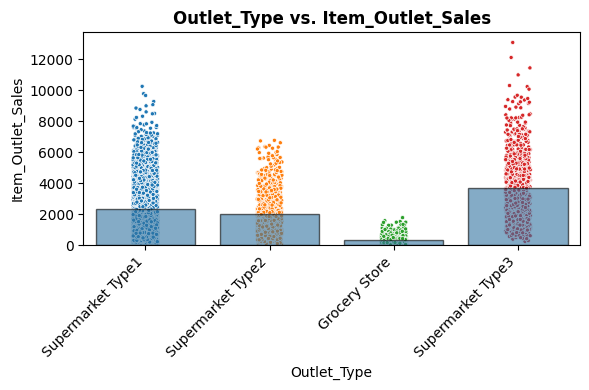

In [52]:
plot_categorical_vs_target(df,x='Outlet_Type', y='Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Answer: Yes
- Does this feature appear to be a predictor of the target?
 - Answer: The plot clearly shows that Supermarket Type 1 has the highest sales, with many data points clustered at higher sales valueswhich means. Supermarket Type 2 also shows a decent number of sales, but significantly lower than Type 1. Grocery Store and Supermarket Type 3 has very low sales, while  has a moderate range of sales. It is a significant contributor to overall sales.The stark differences in sales across outlet types suggest that Outlet_Type does have predictive value.
 It may be useful to consider how to handle the imbalance in the dataset, possibly by combining less frequent types.

#- **Feature Name: Outlet_Size**
 - Definition:The size of the store in terms of ground area covered

##Check Feature Type

In [53]:
df['Outlet_Size'].dtype

dtype('O')

##Univariate Visualization


<ipython-input-42-9db5c58463e2>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


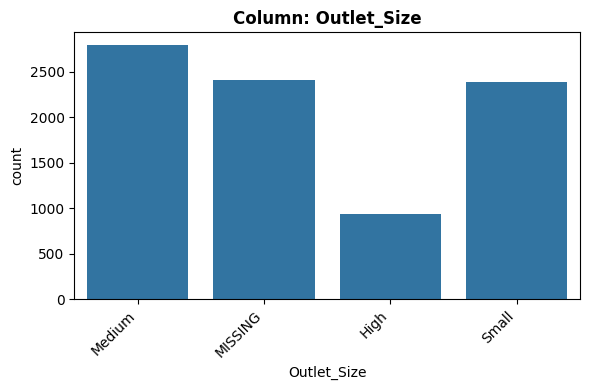

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [54]:
explore_categorical(df,'Outlet_Size');


What type of feature is it? (Categorical (nominal), ordinal, numeric)
  -  Answer: Categorical
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - Answer:2410
- Is the feature constant or quasi-constant?
 - Answer:No
- What is the cardinality? Is it high (>10)?
 - Answer: 4, Low Cardinality
- Would we know this feature before the target is determined?
 - Answer:Yes
- Is there a business case/understanding reason to exclude based on our business case?
 - Answer:The varying counts implies that Outlet_Size may have some predictive value, especially if larger outlets tend to have higher sales. However,  The presence of a "Missing" category could complicate the analysis and there may be a need for exclusion or careful handling in the analysis. Further investigation into its affect on sales and also searching for imputation strategies for missing values would help inform the decision.


##Multi Variate Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
<ipython-input-43-d70d3f54edf4>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


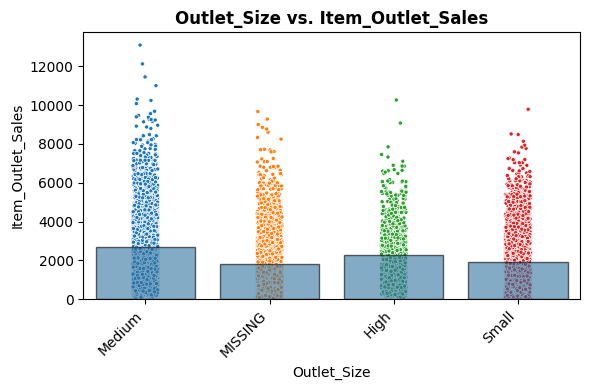

In [55]:
plot_categorical_vs_target(df,x='Outlet_Size', y='Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Answer: Yes
- Does this feature appear to be a predictor of the target?
 - Answer:

clearly we cansee that Medium outlets have the highest sales, significantly higher than the other categories.
High and Small outlets have lower sales, while the Missing category has a wide range but lower sales compared to Medium.
The distinct differences in sales across the outlet sizes suggest that Outlet_Size is indeed a relevant predictor of Item_Outlet_Sales.

Given the strong relationship between outlet size and sales, it can be useful to include Outlet_Size in the analysis. This feature can provide valuable insights for business strategies, such as inventory management and marketing efforts tailored to different outlet sizes.The Missing category should be addressed by substituting values based on other investigations or considering it as a separate category.

The analysis strongly supports tthat the Outlet_Size can be a predictor of Item_Outlet_Sales.

#- **Feature Name: Outlet_Location_Type**
 - Definition:The type of area in which the store is located

##Check Feature Type

In [56]:
df['Outlet_Location_Type'].dtype

dtype('O')

##Univariate Visualization


<ipython-input-42-9db5c58463e2>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


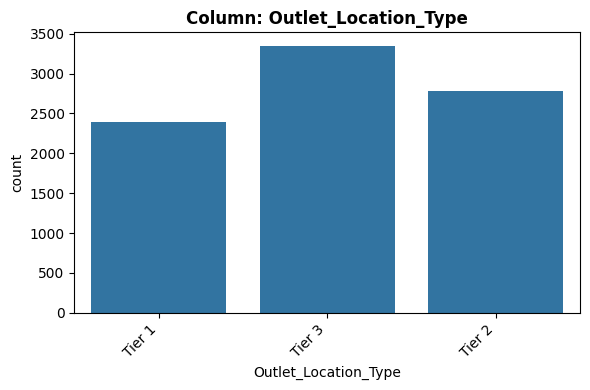

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [57]:
explore_categorical(df,'Outlet_Location_Type');


What type of feature is it? (Categorical (nominal), ordinal, numeric)
  -  Answer: Categorical
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - Answer: 0
- Is the feature constant or quasi-constant?
 - Answer:No
- What is the cardinality? Is it high (>10)?
 - Answer: 3, Low Cardinality
- Would we know this feature before the target is determined?
 - Answer:Yes
- Is there a business case/understanding reason to exclude based on our business case?
 - Answer: it is clear that Tier 3 has the highest count of outlets, followed closely by Tier 1. Tier 2 has the lowest count. This distribution indicates that most outlets are concentrated in the higher-tier categories.
 The varying counts suggest that Outlet_Location_Type may have predictive value, but if the outlet location type does not significantly impact sales or if other features provide similar insights, it may be reasonable to consider excluding it to simplify the model.



##Multi Variate Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
<ipython-input-43-d70d3f54edf4>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


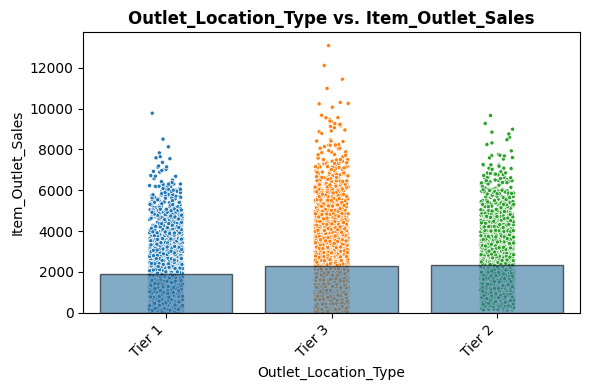

In [58]:
plot_categorical_vs_target(df,x='Outlet_Location_Type', y='Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Answer: Yes
- Does this feature appear to be a predictor of the target?
 - Answer: The plot shows that Tier 3 has the highest median sales, followed by Tier 1 and then Tier 2. This indicates a clear relationship between outlet location type and sales performance which indicate that Outlet_Location_Type is a relevant predictor of Item_Outlet_Sales.

#- **Feature Name: Item_MRP**
 - Definition: Maximum Retail Price (list price) of the product

##Check Feature Type

In [59]:
df['Item_MRP'].dtype

dtype('float64')

##Univariate Visualization


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


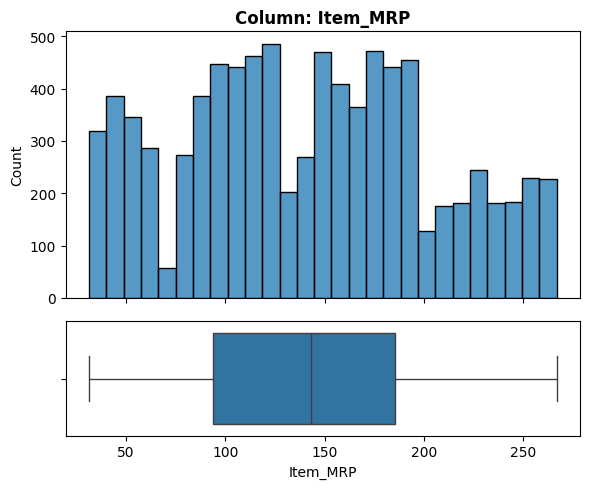

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [60]:
explore_numeric(df,'Item_MRP');


What type of feature is it? (Categorical (nominal), ordinal, numeric)
  -  Answer: Categorical
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - Answer: 0
- Is the feature constant or quasi-constant?
 - Answer:No
- What is the cardinality? Is it high (>10)?
 - Answer: NA, Numeric feature
- Would we know this feature before the target is determined?
 - Answer:Yes
- Is there a business case/understanding reason to exclude based on our business case?
 - Answer: The variation in Item_MRP likely correlates with sales performance. Higher-priced items may have different sales dynamics compared to lower-priced items, making this feature potentially valuable for predicting Item_Outlet_Sales. Based on further analysis of its relationship with sales we can be more adequit about it.


##Multi Variate Visualization

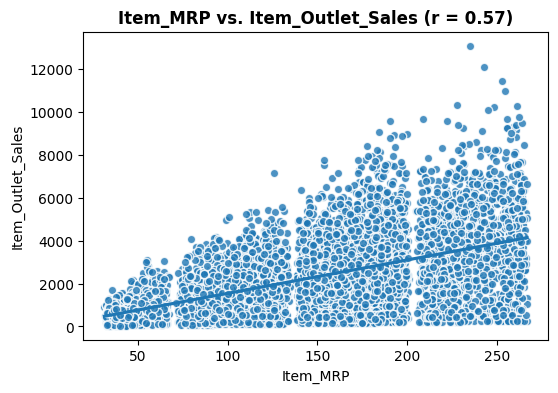

In [61]:
plot_numeric_vs_target(df,x='Item_MRP', y='Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Answer: Yes
- Does this feature appear to be a predictor of the target?
 - Answer: The scatter plot shows a positive correlation between Item_MRP and Item_Outlet_Sales, with a moderate to strong positive correlation. The data points are clustered in distinct bands, showing that items within certain price ranges tend to have similar sales performance. The clear upward trend in the scatter plot reinforces the idea that Item_MRP is a significant predictor of Item_Outlet_Sales. Higher priced items are associated with higher sales, making this feature valuable for modeling.

#- **Feature Name: Item_Type**
 - Definition: The category to which the product belongs

##Check Feature Type

In [62]:
df['Item_Type'].dtype

dtype('O')

##Univariate Visualization


<ipython-input-42-9db5c58463e2>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


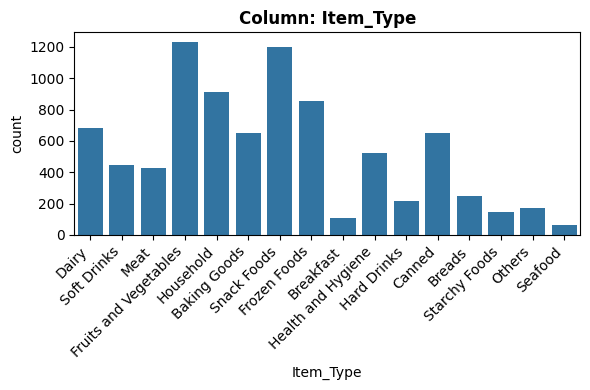

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [63]:
explore_categorical(df,'Item_Type');


What type of feature is it? (Categorical (nominal), ordinal, numeric)
  -  Answer: Categorical
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - Answer: 0
- Is the feature constant or quasi-constant?
 - Answer:No
- What is the cardinality? Is it high (>10)?
 - Answer: 16, High cardinality
- Would we know this feature before the target is determined?
 - Answer:Yes
- Is there a business case/understanding reason to exclude based on our business case?
 - Answer: The plot shows that categories like Dairy, Soft Drinks, and Fruits and Vegetables have the highest counts, while catgories like Seafood and Canned have significantly lower counts. This indicates an uneven distribution of item types.

##Multi Variate Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
<ipython-input-43-d70d3f54edf4>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


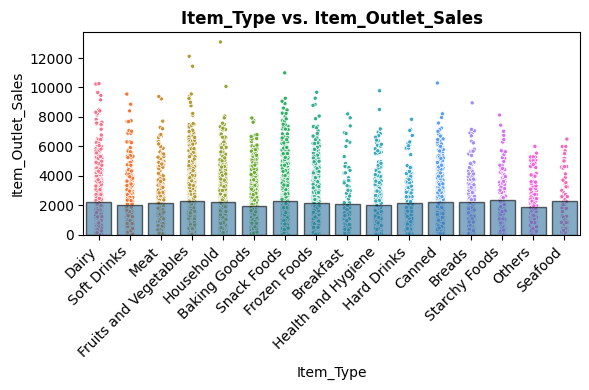

In [64]:
plot_categorical_vs_target(df,x='Item_Type', y='Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Answer: Yes
- Does this feature appear to be a predictor of the target?
 - Answer: The plots indicates distinct sales performance for different item types. The spread of sales within categorys means that while some categories perform good, others no, implying the importance of item type in sales dynamics. Analysis supports that Item_Type is a good predictor of Item_Outlet_Sales.

#- **Feature Name: Outlet_Establishment_Year**
 - Definition: The year in which store was established

##Check Feature Type

In [65]:
df['Outlet_Establishment_Year'].dtype

dtype('int64')

##Univariate Visualization


<ipython-input-42-9db5c58463e2>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


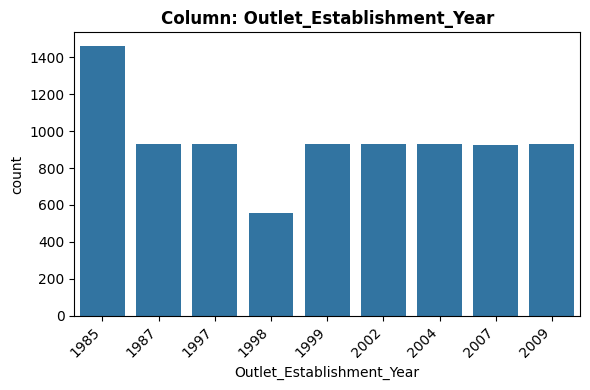

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [66]:
explore_categorical(df,'Outlet_Establishment_Year');


What type of feature is it? (Categorical (nominal), ordinal, numeric)
  -  Answer: Categorical
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - Answer: 0
- Is the feature constant or quasi-constant?
 - Answer:No
- What is the cardinality? Is it high (>10)?
 - Answer: 9, relatively high cardinality
- Would we know this feature before the target is determined?
 - Answer:Yes
- Is there a business case/understanding reason to exclude based on our business case?
 - Answer: The plot shows that the majority of outlets were established in 1985 and 1987, with a noticable drop in counts for other years, particularly 1998. This uneven distribution suggests that most outlets are concentrated in a few specific years. The etablishment year may correlate with sales since people normally trust older ones. Because of low number of establishment years the effectiveness  of it as a predictor may be diturbed. Further analysis of its relationship with sales would help inform the final decision.


##Multi Variate Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
<ipython-input-43-d70d3f54edf4>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


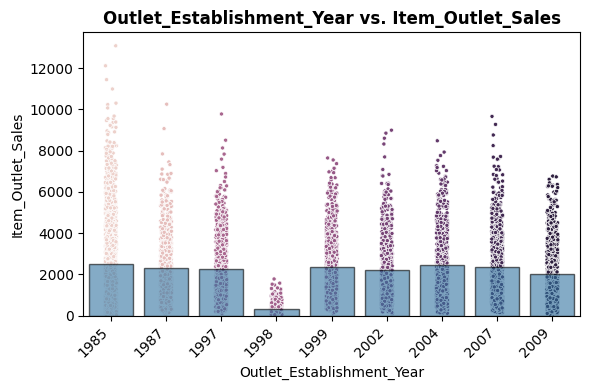

In [67]:
plot_categorical_vs_target(df,x='Outlet_Establishment_Year', y='Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Answer: Yes
- Does this feature appear to be a predictor of the target?
 - Answer: The variation in sales across different establishment years shows that Outlet_Establishment_Year may have some predictive value. Older outlets may have established customer loyalty, while newer outlets might still be making their customer base.The year 1998 stands out with significantly lower sales may be because of some worldwide economical problems. So Outlet_Establishment_Year can be taken as a predictor of Item_Outlet_Sales.

#- **Item_Fat_Content**
 - Definition: Whether the product is low-fat or regular

##Check Feature Type

In [68]:
df['Item_Fat_Content'].dtype

dtype('O')

##Univariate Visualization


<ipython-input-42-9db5c58463e2>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


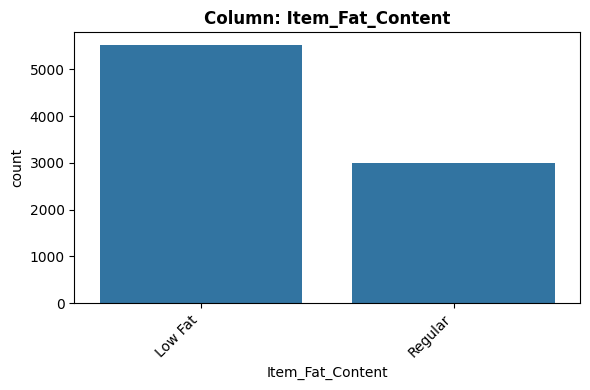

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [69]:
explore_categorical(df,'Item_Fat_Content');


What type of feature is it? (Categorical (nominal), ordinal, numeric)
  -  Answer: Categorical
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - Answer: 0
- Is the feature constant or quasi-constant?
 - Answer:No
- What is the cardinality? Is it high (>10)?
 - Answer: 2, low cardinality
- Would we know this feature before the target is determined?
 - Answer:Yes
- Is there a business case/understanding reason to exclude based on our business case?
 - Answer: The plot shows a significant difference between the two categories with higher counts for law fat. The fat content of items can affect consumers flow.  If further analysis shows that Item_Fat_Content does not impact sales it may be a reasone to exclud it.


##Multi Variate Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
<ipython-input-43-d70d3f54edf4>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


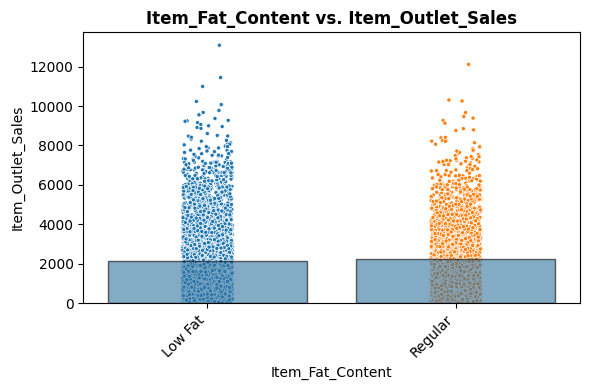

In [70]:
plot_categorical_vs_target(df,x='Item_Fat_Content', y='Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Answer: No
- Does this feature appear to be a predictor of the target?
 - Answer: The plot shows that the sales for the two categories  if  Item_Fat_Content are likely having same sales which indicates that the fat content is not driving sales. This implies that it is better to exclude this feature as a pridector and including it may misslead the prediction.

#**Project 1- Part 5**

# Imports

In [82]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

# Data Cleaning

In [71]:
#Consider the original data set
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [83]:
#Check duplicated values
df2.duplicated().sum()

0

In [84]:
# Check Data Types
df2.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [93]:
#df2.drop(columns='Item_Identifier', inplace=True)

KeyError: "['Item_Identifier'] not found in axis"

In [151]:
# Define num, ohe, and ord cols
allnum_cols= df2.select_dtypes(include=np.number).columns
ord_cols= ["Item_Fat_Content", "Outlet_Size"]
ohe_cols= [ "Item_Type", "Outlet_Identifier", "Outlet_Location_Type","Outlet_Type"]


In [137]:
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [138]:
# check consistency
for i in ord_cols:
  print(df2[i].value_counts())

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64


- Item_Fate_Content is inconsistent

In [139]:
df2['Item_Fat_Content'].value_counts()
replace_dic={'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}
df2['Item_Fat_Content']=df2['Item_Fat_Content'].replace(replace_dic)
df2['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


# Split Data

In [140]:
# Define features and target
X = df2.drop(columns = 'Item_Outlet_Sales')
y = df2['Item_Outlet_Sales']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [154]:
num_cols=allnum_cols.drop('Item_Outlet_Sales')
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

# Processing Pipelines for all data types

In [155]:
X_train.isna().sum()

,0
Item_Weight,1107
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1812
Outlet_Location_Type,0
Outlet_Type,0


In [156]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA
# instantiate preprocessors
impute_mean = SimpleImputer(strategy='mean')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_mean, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [157]:
df2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [166]:
X_train[ord_cols].isna().sum()

,0
Item_Fat_Content,0
Outlet_Size,1812


In [168]:
# PREPROCESSING PIPELINE FOR ORDINAL DATA
# Create imputer for ordinal data
impute_na_ord = SimpleImputer(strategy='constant', fill_value='NA')
## Making the OrdinalEncoder
# Specifying order of categories for our  Ordinal Qual/Cond Columms
fat_orders = ["Low Fat", "Regular"]
outlet_size_orders= ["NA", "Small", "Medium", "High"]
# Making the list of order lists for OrdinalEncoder
ordinal_category_orders = [fat_orders, outlet_size_orders]
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
# Making a final scaler to scale category #'s
scaler_ord = StandardScaler()
## Making an ord_pipe
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
ord_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Low Fat', 'Regular'],
                                            ['NA', 'Small', 'Medium',
                                             'High']])),
                ('standardscaler', StandardScaler())])

In [169]:
# PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "NA")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
ohe_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

# Make tuples for all data types

In [170]:
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

In [171]:
# Making an ordinal_tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['Low Fat', 'Regular'],
                                             ['NA', 'Small', 'Medium',
                                              'High']])),
                 ('standardscaler', StandardScaler())]),
 ['Item_Fat_Content', 'Outlet_Size'])

In [172]:
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 ['Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type'])

# Make the columntransformer

In [173]:
# Instantiate COLUMNTRASFORMER with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)
col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEn...
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Fat_Content', 'Outlet_Size']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Item_Type', 'Outlet_Identifier',
                                  'Outlet_Location_Type', 'Outlet_Type'])],
                  verbose_feature_names_out=False)

In [174]:
# Fit on training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEn...
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Fat_Content', 'Outlet_Size']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Item_Type', 'Outlet_Identifier',
                                  'Outlet_Location_Type', 'Outlet_Type'])],
                  verbose_feature_names_out=False)

In [181]:
# Transform the training data
X_train_processed = col_transformer.transform(X_train)
# Transform the testing data
X_test_processed = col_transformer.transform(X_test)
# View the processed training data
X_train_processed

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content,Outlet_Size,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.817249,-0.712775,1.828109,1.327849,-0.740321,0.748125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.556340,-1.291052,0.603369,1.327849,1.350766,0.748125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.131512,1.813319,0.244541,0.136187,1.350766,0.748125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.169219,-1.004931,-0.952591,0.732018,-0.740321,-0.264370,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.528819,-0.965484,-0.336460,0.493686,-0.740321,-1.276865,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.832409,4.309657,-0.044657,0.017021,1.350766,-1.276865,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5191,0.639356,1.008625,-1.058907,1.089517,-0.740321,-1.276865,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5390,1.113736,-0.920527,1.523027,0.493686,-0.740321,-1.276865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
860,1.766009,-0.227755,-0.383777,1.089517,-0.740321,-1.276865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [180]:

X_train_processed.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content,Outlet_Size,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.0,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00
mean,0.00,-0.00,0.00,-0.00,0.00,0.00,0.07,0.03,0.01,0.08,0.08,0.1,0.15,0.03,0.06,0.11,0.05,0.02,0.01,0.14,0.05,0.02,0.06,0.11,0.11,0.11,0.06,0.11,0.11,0.11,0.11,0.11,0.27,0.33,0.40,0.12,0.65,0.11,0.11
std,1.00,1.00,1.00,1.00,1.00,1.00,0.26,0.16,0.11,0.26,0.27,0.3,0.36,0.16,0.24,0.31,0.21,0.14,0.08,0.35,0.22,0.14,0.25,0.31,0.31,0.31,0.24,0.32,0.31,0.31,0.31,0.31,0.45,0.47,0.49,0.33,0.48,0.31,0.32
min,-1.98,-1.29,-1.77,-1.53,-0.74,-1.28,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.81,-0.76,-0.76,-1.29,-0.74,-1.28,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,-0.23,0.03,0.14,-0.74,-0.26,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,0.76,0.56,0.72,0.73,1.35,0.75,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00
max,2.00,5.13,1.99,1.33,1.35,1.76,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
